# 散点图

In [6]:
import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## version I
- 一个最普通的散点图

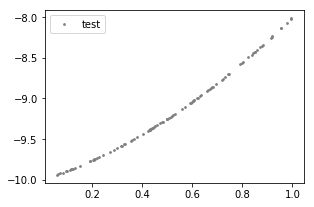

In [60]:
x = np.random.rand(100)
y = x**2 + x - 10
fig = plt.figure()
ax = fig.add_axes((0.2,0.2,0.6,0.6))
ax.scatter(x, y, c=np.array((0.5,0.5,0.5)).reshape((1,-1)), s= 3, label='test')
ax.legend()
plt.show()

## version II
- 根据点的类别不同显示不同的颜色
- 但是无法设置对应的legend

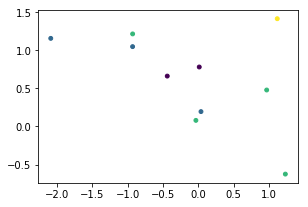

In [43]:
x = np.random.randn(10,2)
# y 也就是label，每个点对应的类别，共有4类
y = np.array([0,1,2,3,2,2,2,0,1,1])
fig=plt.figure()
ax = fig.add_axes((0.2,0.2,0.6,0.6))
ax.scatter(x[:,0],x[:,1],c=y,s=15)
plt.show()

## version III
- 根据点的类别不同设置不同的颜色
- 同时将点的颜色与其对应的类别以legend的形式显示出来

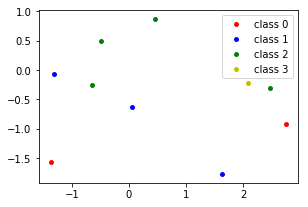

In [44]:
x = np.random.randn(10,2)
# y 也就是label，每个点对应的类别，共有4类
y = np.array([0,1,2,3,2,2,2,0,1,1])
fig=plt.figure()
ax = fig.add_axes((0.2,0.2,0.6,0.6))
colors = ['r', 'b', 'g', 'y']
for i in range(4):
    ax.scatter(x[y==i,0],x[y==i,1], c=colors[i], s=15,label=f'class {i}')

ax.legend()
plt.show()

In [51]:
plt.cm.tab10.colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

In [46]:
np.linspace(0, 1, 8)

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [56]:
plt.cm.tab10(50)

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

# exercise

In [61]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [62]:
categories = np.unique(midwest['category'])

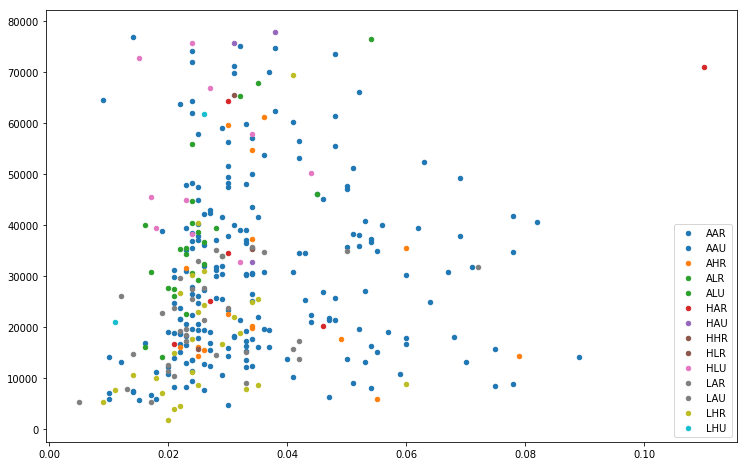

In [64]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes((0.2,0.2,0.6,0.6))

for i in range(len(categories)):
    ax.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

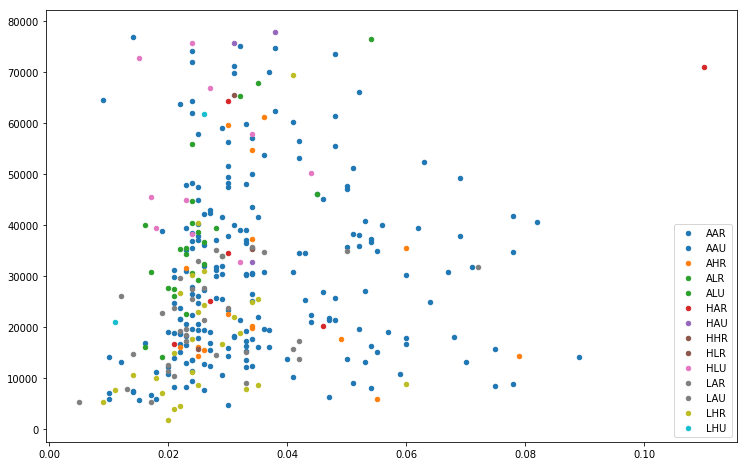

In [69]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes((0.2,0.2,0.6,0.6))
colors = [plt.cm.tab10(i/len(categories)) for i in range(len(categories))]
for i in range(len(categories)):
    ax.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(colors[i]).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

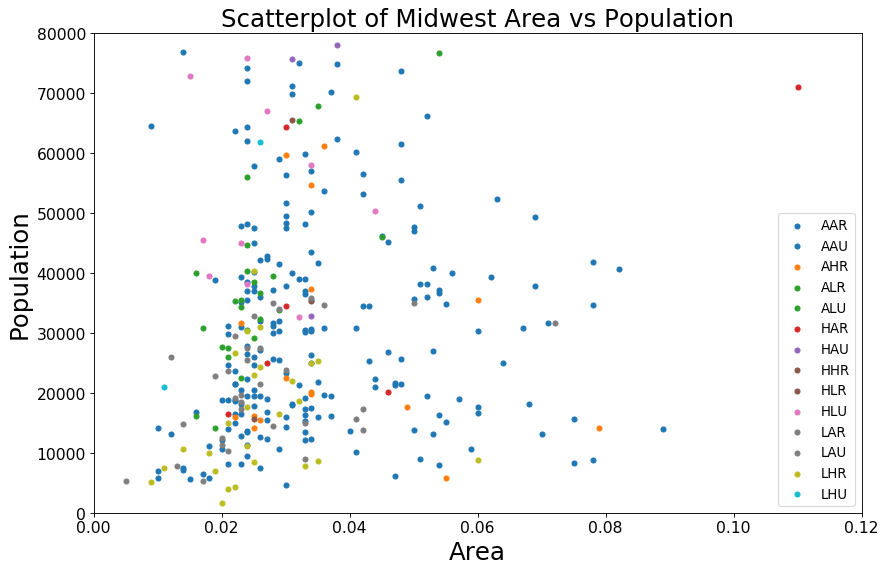

In [92]:
fig = plt.figure(figsize=(16,10), 
                 dpi=80,# 图像分辨率
                facecolor='w', # 图像的背景颜色，设置为白色
                edgecolor='k', # 图像的边框颜色
                )
ax = fig.add_axes((0.2,0.2,0.6,0.6))
for i, category in enumerate(categories):
    ax.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :],
              s=20, c=np.array(colors[i]).reshape(1,-1),
              label=str(category))

ax.set(xlim=(0.0,0.12), ylim=(0,80000))
# tick set
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set(fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set(fontsize=14)
# xlabel, ylabel set 
ax.set_xlabel('Area', fontsize=22)
ax.set_ylabel('Population',fontsize=22)
# title set
ax.set_title('Scatterplot of Midwest Area vs Population', fontsize=22)
ax.legend(fontsize=12)
plt.show()